In [2]:
# ==========================
# Pneumonia Detection from Chest X-Rays
# ==========================

# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# --------------------------
# Paths (adjust if necessary)
# --------------------------
# Fix: Use raw strings (r prefix) or double backslashes or forward slashes for Windows paths
train_dir = r'C:\Users\Z BOOK\Pneumonia-Detection\chest_xray\train'
val_dir   = r'C:\Users\Z BOOK\Pneumonia-Detection\chest_xray\test'
test_dir  = r'C:\Users\Z BOOK\Pneumonia-Detection\chest_xray\val'

# Alternative solutions:
# train_dir = 'C:\\Users\\Z BOOK\\Pneumonia-Detection\\chest_xray\\train'
# OR
# train_dir = 'C:/Users/Z BOOK/Pneumonia-Detection/chest_xray/train'

model_path   = '../models/pneumonia_cnn_model.h5'
results_path = '../results/'

# Create results folder if not exists
os.makedirs(results_path, exist_ok=True)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


C:\Users\Z BOOK\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\Z BOOK\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.7740 - loss: 0.4947 - val_accuracy: 0.8553 - val_loss: 0.4064
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 160s 968ms/step - accuracy: 0.8704 - loss: 0.3036 - val_accuracy: 0.8405 - val_loss: 0.3851
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 133s 814ms/step - accuracy: 0.8997 - loss: 0.2590 - val_accuracy: 0.8898 - val_loss: 0.2906
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 856ms/step - accuracy: 0.9003 - loss: 0.2465 - val_accuracy: 0.8586 - val_loss: 0.3419
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 862ms/step - accuracy: 0.9122 - loss: 0.2252 - val_accuracy: 0.8717 - val_loss: 0.3449
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 136s 830ms/step - accuracy: 0.9181 - loss: 0.2041 - val_accuracy: 0.8602 - val_loss: 0.3918
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 137s 838ms/step - accuracy: 0.9248 - loss: 0.1939 - val_accuracy: 0.8783 - val_loss: 0.3335
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 136s 834ms/step - accuracy: 0.9210 - lo

Model saved at ../models/pneumonia_cnn_model.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.6250 - loss: 0.8179
Test Accuracy: 62.50%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


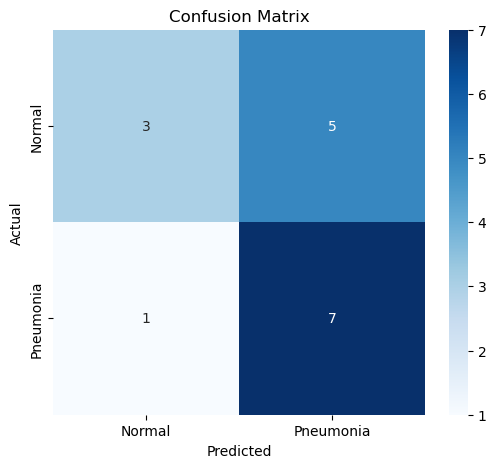

Classification Report:

              precision    recall  f1-score   support

      Normal       0.75      0.38      0.50         8
   Pneumonia       0.58      0.88      0.70         8

    accuracy                           0.62        16
   macro avg       0.67      0.62      0.60        16
weighted avg       0.67      0.62      0.60        16



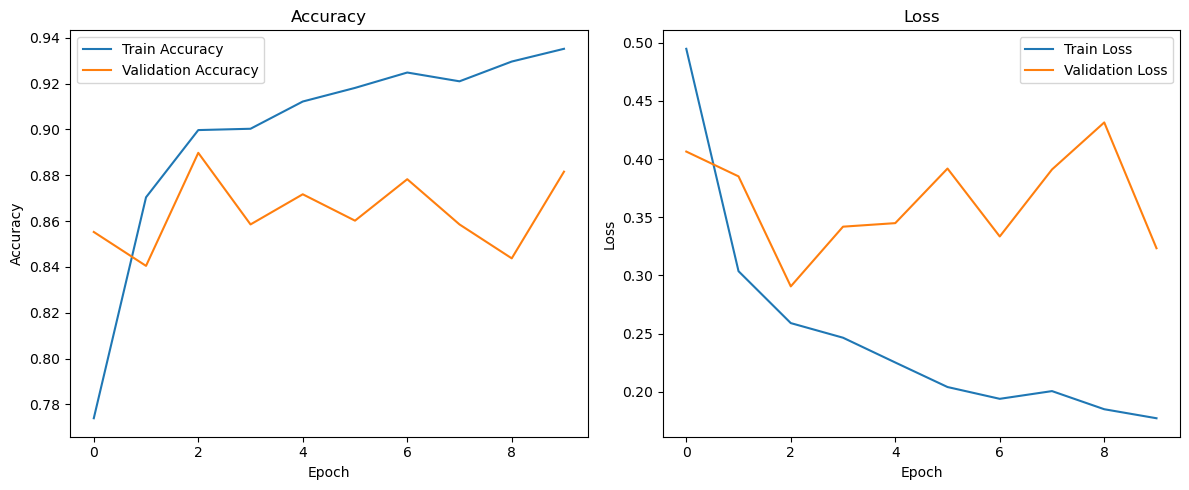

In [3]:
# ==========================
# Data Preprocessing & Augmentation
# ==========================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# ==========================
# Build CNN Model
# ==========================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# ==========================
# Train Model
# ==========================
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples//val_generator.batch_size,
    epochs=10
)

# ==========================
# Save Trained Model
# ==========================
model.save(model_path)
print(f"Model saved at {model_path}")

# ==========================
# Evaluate Model on Test Set
# ==========================
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Predictions
predictions = model.predict(test_generator)
y_pred = np.where(predictions > 0.5, 1, 0)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal','Pneumonia'], yticklabels=['Normal','Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(results_path,'confusion_matrix.png'))
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=['Normal','Pneumonia']))

# ==========================
# Plot Training History
# ==========================
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(results_path,'accuracy_loss_plot.png'))
plt.show()


In [2]:
# ==========================
# Gradio UI for Pneumonia Detection
# ==========================
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load trained model and compile to remove warnings
model = load_model('../models/pneumonia_cnn_model.h5')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prediction function
def predict_pneumonia(img):
    img = img.resize((150,150))
    img_array = np.array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)
    return "PNEUMONIA" if pred[0][0] > 0.5 else "NORMAL"

# Gradio interface
interface = gr.Interface(
    fn=predict_pneumonia,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Pneumonia Detection",
    description="Upload a chest X-ray image and the model will predict whether it is NORMAL or PNEUMONIA."
)

# Launch the interface
interface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
